In [81]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? N
Nothing done.


# Decision Tree 
## Student DataSet

In [1]:
#Importing the libraries.

import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split  # for spliting the data 
from sklearn import preprocessing  # for data transformation
from sklearn.ensemble import AdaBoostClassifier  #for implementing ADABoost
from sklearn.tree import DecisionTreeClassifier, export_graphviz #for implementing Decision tree and showing the graphs
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import graphviz
from sklearn import tree
from matplotlib.pylab import rcParams
import warnings


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 15, 6

In [2]:
student_data = pd.read_csv("student-mat.csv", sep=";")
student_data.head()

#Droping the column 'G1' and 'G3'.
student_data.drop(["G1","G2"], axis=1, inplace= True)


# Taking the meadian of the "G3" as a threhold for the transforming it into bimary data.
student_data.head()
median_G3 = student_data["G3"].median()
median_G3

student_data['G3'] =  np.where(student_data['G3'] >= median_G3, 1, 0)

# 1: for all marks greater than or equal to median: Good_Marks
# 0: for all marks less than median: Not_Good_Marks

student_data.head().T


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,10


11.0

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


# Pefroming some EDA with Student_Data

### Checking the dataset for the Null values:

In [3]:
student_data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G3            False
dtype: bool

** The input data doesnot contain any missing data, so we don't have to perform any Missing data treatement **

### Correcting the datatype of the variables

In [4]:
feature_cat = student_data.select_dtypes(include=['object']).columns.values
feature_num = student_data.select_dtypes(include=['int64']).columns.values
feature_cat
feature_num
# From the discription of the dataset below are the numerical variabled that we need to convert as ordinal.
#variables needed to be treated: Medu, Fedu, traveltime, studytime, famrel, freetime, goout, Dalc, Walc,health

treatment_ordered = ['famsize','Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 
                    'Dalc', 'Walc', 'health', 'G3']
treatment_catergorical = ['school', 'sex', 'address','Pstatus','Mjob', 'Fjob','reason','guardian','schoolsup', 
                          'famsup','paid', 'activities','nursery', 'higher', 'internet', 'romantic']

for i in treatment_ordered:
    student_data[i] = pd.Categorical(student_data[i], ordered=True)
    
for i in treatment_catergorical:
    student_data[i] = pd.Categorical(student_data[i])

student_data.dtypes
feature_cat_n = student_data.select_dtypes(include=['category']).columns.values
feature_num_n = student_data.select_dtypes(include=['int64']).columns.values
feature_cat_n

array(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'], dtype=object)

array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G3'], dtype=object)

school        category
sex           category
age              int64
address       category
famsize       category
Pstatus       category
Medu          category
Fedu          category
Mjob          category
Fjob          category
reason        category
guardian      category
traveltime    category
studytime     category
failures      category
schoolsup     category
famsup        category
paid          category
activities    category
nursery       category
higher        category
internet      category
romantic      category
famrel        category
freetime      category
goout         category
Dalc          category
Walc          category
health        category
absences         int64
G3            category
dtype: object

array(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'Dalc', 'Walc', 'health', 'G3'], dtype=object)

** The discriptive analysis of the data-set. **

In [5]:
student_data.describe(include='category')
print("Descriptive analysis for the categocial variable\n")
student_data.describe()
print("Descriptive analysis for the numerical variable\n")


# The min and max for both the numeric variable are different, we need to standarize it. 
student_data[feature_num_n] = (student_data[feature_num_n] - student_data[feature_num_n].mean())/ (student_data[feature_num_n].max() - student_data[feature_num_n].min())

student_data.describe()
print("Descriptive analysis for the numerical variable (after normalizing the variables)\n")

student_data.head()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G3
count,395,395,395,395,395,395,395,395,395,395,...,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,5,5,4,...,2,2,2,5,5,5,5,5,5,2
top,GP,F,U,GT3,T,4,2,other,other,course,...,yes,yes,no,4,3,3,1,1,5,1
freq,349,208,307,281,354,131,115,141,217,145,...,375,329,263,195,157,130,276,151,146,209


Descriptive analysis for the categocial variable



,age,absences
count,395.000000,395.000000
mean,16.696203,5.708861
std,1.276043,8.003096
min,15.000000,0.000000
25%,16.000000,0.000000
50%,17.000000,4.000000
75%,18.000000,8.000000
max,22.000000,75.000000


Descriptive analysis for the numerical variable



,age,absences
count,3.950000e+02,3.950000e+02
mean,-1.356159e-16,-6.556816e-18
std,1.822918e-01,1.067079e-01
min,-2.423146e-01,-7.611814e-02
25%,-9.945750e-02,-7.611814e-02
50%,4.339964e-02,-2.278481e-02
75%,1.862568e-01,3.054852e-02
max,7.576854e-01,9.238819e-01


Descriptive analysis for the numerical variable (after normalizing the variables)



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,0.186257,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,0.003882,0
1,GP,F,0.043400,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,-0.022785,0
2,GP,F,-0.242315,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,0.057215,0
3,GP,F,-0.242315,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,-0.049451,1
4,GP,F,-0.099458,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,-0.022785,0


In [6]:
def makeDummy(categorical):
    #this function will make the dummy vairable from the categorical variable.
    return pd.get_dummies(categorical, drop_first= True, prefix= categorical.name)

In [7]:
# converting the categorical variables into dummy variables. #onehotencoding.
for i in feature_cat_n:
    if i == 'G3':
        continue
    else:
        data_dummy = makeDummy(student_data[i])
        student_data = student_data.drop(i, axis = 1)
        student_data = pd.concat([student_data, data_dummy], axis = 1)

student_data.head()

,age,absences,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Medu_1,Medu_2,...,Dalc_4,Dalc_5,Walc_2,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5
0,0.186257,0.003882,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.043400,-0.022785,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.242315,0.057215,0,0,0,1,1,1,1,0,...,0,0,0,1,0,0,0,1,0,0
3,-0.242315,-0.049451,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.099458,-0.022785,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


## Splitting the data into test and train 

In [49]:
x_train, x_test, y_train, y_test = train_test_split(student_data.drop(['G3'], axis=1), student_data[['G3']],test_size = 0.2, 
random_state = 0 )

x_train.head()
print("\n")

y_train.head()
#print("The head of the train dataset dependent variable\n")

,age,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Medu_1,Medu_2,Medu_3,...,Dalc_4,Dalc_5,Walc_2,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5
64,-0.242315,-0.076118,0,0,1,1,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
55,-0.099458,0.030549,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
343,0.043400,-0.076118,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
219,0.043400,-0.022785,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
366,0.186257,-0.076118,1,1,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


,G3
64,0
55,0
343,0
219,0
366,1


In [61]:
# for comparision of different Models
accuracy_train_f = [None]*4
accuracy_test_f = [None]*4

# Decision Tree (without Pruning) using gini index

In [60]:
DT_Student = DecisionTreeClassifier(random_state=0)
DT_Student.fit(x_train, y_train)
predictions = DT_Student.predict(x_test)

print("Decision Tree, without Pruning")
print("\n")
print("Acuracy on training set: {:.3f}".format(DT_Student.score(x_train, y_train)*100))
print("Acuracy on test set: {:.3f}".format(DT_Student.score(x_test, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Decision Tree, without Pruning


Acuracy on training set: 100.000
Acuracy on test set: 54.430

 Confusion Matrix: 

[[17 22]
 [14 26]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.55      0.44      0.49        39
          1       0.54      0.65      0.59        40

avg / total       0.54      0.54      0.54        79



In [10]:
accuracy_test=[None]*15
accuracy_train=[None]*15
count=0
for max_depth in range(1,15):
    Decision_tree= DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    Decision_tree.fit(x_train, y_train)
    accuracy_train[count]=Decision_tree.score(x_train, y_train)
    accuracy_test[count]=Decision_tree.score(x_test, y_test)
    count+=1

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Text(0.5,1,'Decision Tree | Accuracy vs Tree depth')

Text(0.5,0,'Tree Depth')

Text(0,0.5,'Accuracy')

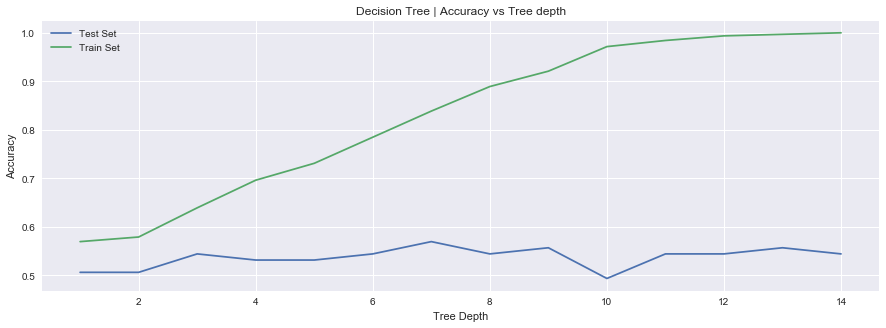

In [11]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(range(1,16),accuracy_test)
ax1.plot(range(1,16),accuracy_train)


plt.title("Decision Tree | Accuracy vs Tree depth")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")

plt.legend(['Test Set','Train Set'])

** The accuraccy of the train dataset increases as the tree depth increases and eventually the it reaches to 1, which results to the overfitting of the model. <br><br>
The accuracy of the test dataset increases as the depth increases but after certain depth is starts to decreases, which is expected. <br>
From the graph of accuracy as the function of tree depth, it as clear that for this dataset the optimum tree depth is 7. **

# Decision Tree with Pruning (with depth = 7)

In [63]:
DT_Student = DecisionTreeClassifier(random_state=0, max_depth=7)
DT_Student.fit(x_train, y_train)
predictions = DT_Student.predict(x_test)

print("Decision Tree, with Pruning")
print("\n")
print("Acuracy on training set: {:.3f}".format(DT_Student.score(x_train, y_train)*100))
print("Acuracy on test set: {:.3f}".format(DT_Student.score(x_test, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))

accuracy_train_f[0] =  np.round(DT_Student.score(x_train, y_train)*100,2)
accuracy_test_f[0] =  np.round(DT_Student.score(x_test, y_test)*100,2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Decision Tree, with Pruning


Acuracy on training set: 83.861
Acuracy on test set: 56.962

 Confusion Matrix: 

[[20 19]
 [15 25]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.57      0.51      0.54        39
          1       0.57      0.62      0.60        40

avg / total       0.57      0.57      0.57        79



## Ploting the Decision Tree for depth = 7 using gini index

0

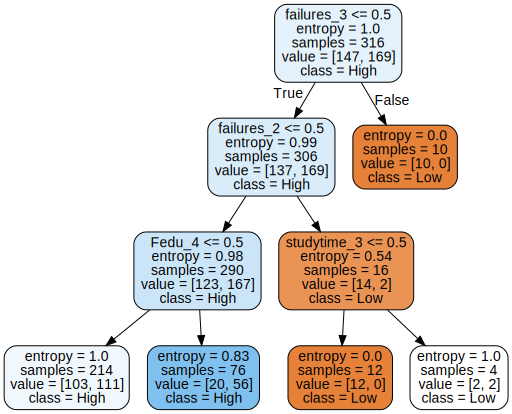

In [71]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(DT_Student, out_file='tree.dot', 
                feature_names = list(x_train.columns),
                class_names = ['Low', 'High'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'studenttree1.png', '-Gdpi=600'])

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Text(0.5,1,'Decision Tree | Accuracy vs Tree depth')

Text(0.5,0,'Tree Depth')

Text(0,0.5,'Accuracy')

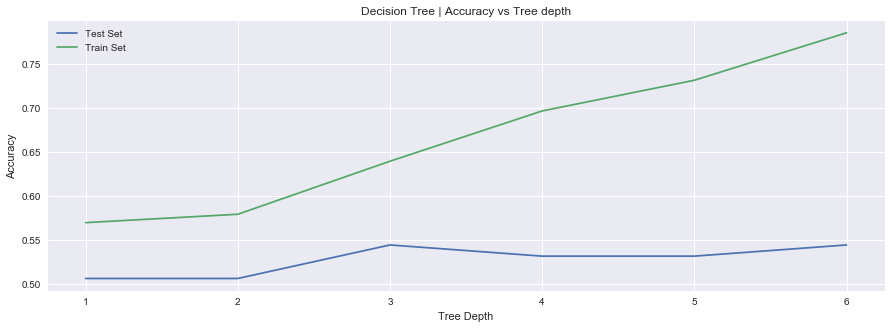

In [14]:
accuracy_test=[None]*7
accuracy_train=[None]*7
count=0
for max_depth in range(1,7):
    Decision_tree= DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    Decision_tree.fit(x_train, y_train)
    accuracy_train[count]=Decision_tree.score(x_train, y_train)
    accuracy_test[count]=Decision_tree.score(x_test, y_test)
    count+=1

ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(range(1,8),accuracy_test)
ax1.plot(range(1,8),accuracy_train)


plt.title("Decision Tree | Accuracy vs Tree depth")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")

plt.legend(['Test Set','Train Set'])

# Decision Tree (without Pruning) using Information Gain.

In [15]:
DT_Student = DecisionTreeClassifier(random_state=0, criterion= 'entropy')
DT_Student.fit(x_train, y_train)
predictions = DT_Student.predict(x_test)

print("Decision Tree, without Pruning")
print("\n")
print("Acuracy on training set: {:.3f}".format(DT_Student.score(x_train, y_train)*100))
print("Acuracy on test set: {:.3f}".format(DT_Student.score(x_test, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Decision Tree, without Pruning


Acuracy on training set: 100.000
Acuracy on test set: 55.696

 Confusion Matrix: 

[[22 17]
 [18 22]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.55      0.56      0.56        39
          1       0.56      0.55      0.56        40

avg / total       0.56      0.56      0.56        79



In [50]:
accuracy_test=[None]*15
accuracy_train=[None]*15
count=0
for max_depth in range(1,15):
    Decision_tree= DecisionTreeClassifier(max_depth=max_depth, random_state=0,criterion= 'entropy')
    Decision_tree.fit(x_train, y_train)
    accuracy_train[count]=Decision_tree.score(x_train, y_train)
    accuracy_test[count]=Decision_tree.score(x_test, y_test)
    count+=1

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Text(0.5,1,'Decision Tree | Accuracy vs Tree depth')

Text(0.5,0,'Tree Depth')

Text(0,0.5,'Accuracy')

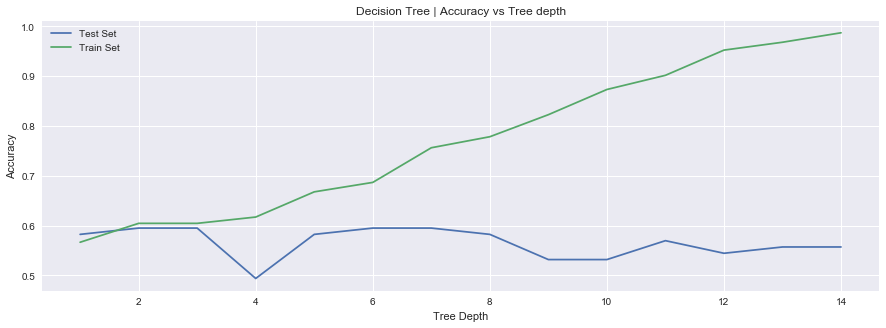

In [51]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(range(1,16),accuracy_test)
ax1.plot(range(1,16),accuracy_train)


plt.title("Decision Tree | Accuracy vs Tree depth")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")

plt.legend(['Test Set','Train Set'])

** The accuraccy of the train dataset increases as the tree depth increases and eventually the it reaches to 1, which results to the overfitting of the model. **
<br><br>
** The accuracy of the test dataset increases as the depth increases but after certain depth is starts to decreases, which is expected. <br>
From the graph of accuracy as the function of tree depth, it as clear that for this dataset the optimum tree depth is 3. **

# Ploting the Decision Tree for depth = 3 using InformationGain.

In [64]:
DT_Student = DecisionTreeClassifier(random_state=0, max_depth=3, criterion='entropy')
DT_Student.fit(x_train, y_train)
predictions = DT_Student.predict(x_test)

print("Decision Tree, with Pruning")
print("\n")
print("Acuracy on training set: {:.3f}".format(DT_Student.score(x_train, y_train)*100))
print("Acuracy on test set: {:.3f}".format(DT_Student.score(x_test, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))

accuracy_train_f[1] =  np.round(DT_Student.score(x_train, y_train)*100,2)
accuracy_test_f[1] =  np.round(DT_Student.score(x_test, y_test)*100,2)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Decision Tree, with Pruning


Acuracy on training set: 60.443
Acuracy on test set: 59.494

 Confusion Matrix: 

[[ 7 32]
 [ 0 40]]

 Classification Report: 

             precision    recall  f1-score   support

          0       1.00      0.18      0.30        39
          1       0.56      1.00      0.71        40

avg / total       0.77      0.59      0.51        79



0

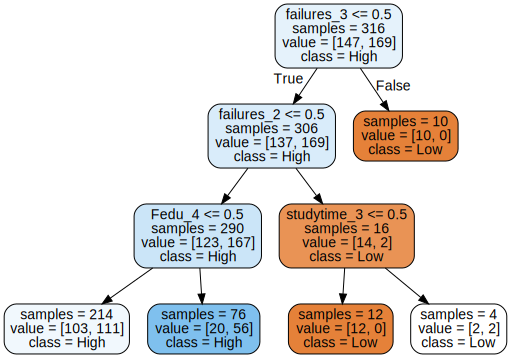

In [72]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(DT_Student, out_file='tree1.dot', 
                feature_names = list(x_train.columns),
                class_names = ['Low', 'High'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, impurity=False)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'studenttree2.png', '-Gdpi=600'])

with open("tree1.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Text(0.5,1,'Decision Tree | Accuracy vs Tree depth')

Text(0.5,0,'Tree Depth')

Text(0,0.5,'Accuracy')

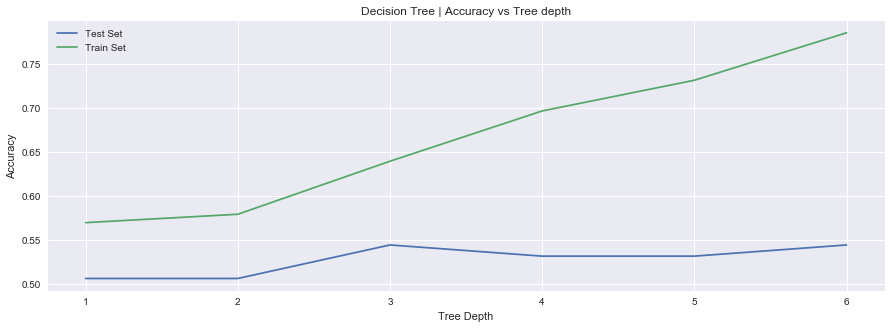

In [26]:
accuracy_test=[None]*7
accuracy_train=[None]*7
count=0
for max_depth in range(1,7):
    Decision_tree= DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    Decision_tree.fit(x_train, y_train)
    accuracy_train[count]=Decision_tree.score(x_train, y_train)
    accuracy_test[count]=Decision_tree.score(x_test, y_test)
    count+=1

ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(range(1,8),accuracy_test)
ax1.plot(range(1,8),accuracy_train)


plt.title("Decision Tree | Accuracy vs Tree depth")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")

plt.legend(['Test Set','Train Set'])

# ADA Boosting without Pruning (using gini index as spliting criteria)

In [24]:
Decision_tree= DecisionTreeClassifier( random_state=0)
Adaboost_Classifier = AdaBoostClassifier(base_estimator=Decision_tree)
Adaboost_Classifier.fit(x_train, y_train)
predictions = Adaboost_Classifier.predict(x_test)
print("Decision Tree with Adaboost ")
print("\n")
print("Acuracy on training set: {:.3f}".format(Adaboost_Classifier.score(x_train, y_train)*100))
print("Acuracy on test set: {:.3f}".format(Adaboost_Classifier.score(x_test, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

Decision Tree with Adaboost 


Acuracy on training set: 100.000
Acuracy on test set: 50.633

 Confusion Matrix: 

[[18 21]
 [18 22]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.50      0.46      0.48        39
          1       0.51      0.55      0.53        40

avg / total       0.51      0.51      0.51        79



In [25]:
accuracy_test=[None]*15
accuracy_train=[None]*15
count=0
for max_depth in range(1,15):
    Decision_tree= DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    Adaboost_Classifier = AdaBoostClassifier(base_estimator=Decision_tree)
    Adaboost_Classifier.fit(x_train, y_train)
    accuracy_train[count]=Adaboost_Classifier.score(x_train, y_train)
    accuracy_test[count]=Adaboost_Classifier.score(x_test, y_test)
    count+=1

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

Text(0.5,1,'Decision Tree with Adaboost | Accuracy vs Tree depth')

Text(0.5,0,'Tree Depth')

Text(0,0.5,'Accuracy')

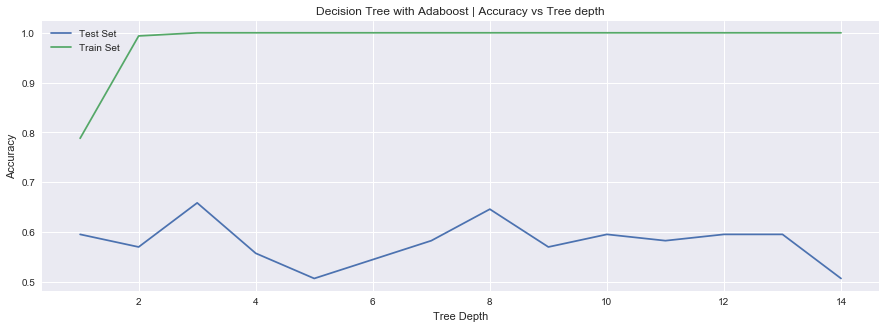

In [27]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(range(1,16),accuracy_test)
ax1.plot(range(1,16),accuracy_train)


plt.title("Decision Tree with Adaboost | Accuracy vs Tree depth")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")

plt.legend(['Test Set','Train Set'])

** The accuraccy of the train dataset increases as the tree depth increases and eventually the it reaches close to 1, which results to the overfitting of the model. <br><br>
The accuracy of the test dataset increases as the depth increases but after certain depth is starts to decreases, which is expected. <br>
From the graph of accuracy as the function of tree depth, it as clear that for this dataset the optimum tree depth is 3. **

## ADA Boosting with Pruning

In [65]:
Decision_tree= DecisionTreeClassifier( random_state=0, max_depth=3)
Adaboost_Classifier = AdaBoostClassifier(base_estimator=Decision_tree)
Adaboost_Classifier.fit(x_train, y_train)
predictions = Adaboost_Classifier.predict(x_test)
print("Decision Tree with Adaboost ")
print("\n")
print("Acuracy on training set: {:.3f}".format(Adaboost_Classifier.score(x_train, y_train)*100))
print("Acuracy on test set: {:.3f}".format(Adaboost_Classifier.score(x_test, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))

accuracy_train_f[2] =  np.round(DT_Student.score(x_train, y_train)*100,2)
accuracy_test_f[2] =  np.round(DT_Student.score(x_test, y_test)*100,2)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

Decision Tree with Adaboost 


Acuracy on training set: 100.000
Acuracy on test set: 60.759

 Confusion Matrix: 

[[21 18]
 [13 27]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.62      0.54      0.58        39
          1       0.60      0.68      0.64        40

avg / total       0.61      0.61      0.61        79



# ADA Boosting without Pruning (using information gain as spliting criteria)

In [35]:
Decision_tree= DecisionTreeClassifier( random_state=0, criterion='entropy')
Adaboost_Classifier = AdaBoostClassifier(base_estimator=Decision_tree)
Adaboost_Classifier.fit(x_train, y_train)
predictions = Adaboost_Classifier.predict(x_test)
print("Decision Tree with Adaboost ")
print("\n")
print("Acuracy on training set: {:.3f}".format(Adaboost_Classifier.score(x_train, y_train)*100))
print("Acuracy on test set: {:.3f}".format(Adaboost_Classifier.score(x_test, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

Decision Tree with Adaboost 


Acuracy on training set: 100.000
Acuracy on test set: 55.696

 Confusion Matrix: 

[[22 17]
 [18 22]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.55      0.56      0.56        39
          1       0.56      0.55      0.56        40

avg / total       0.56      0.56      0.56        79



In [40]:
accuracy_test=[None]*15
accuracy_train=[None]*15
count=0
for max_depth in range(1,15):
    Decision_tree= DecisionTreeClassifier(max_depth=max_depth, random_state=0, criterion='entropy')
    Adaboost_Classifier = AdaBoostClassifier(base_estimator=Decision_tree)
    Adaboost_Classifier.fit(x_train, y_train)
    accuracy_train[count]=Adaboost_Classifier.score(x_train, y_train)
    accuracy_test[count]=Adaboost_Classifier.score(x_test, y_test)
    count+=1

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

Text(0.5,1,'Decision Tree with Adaboost | Accuracy vs Tree depth')

Text(0.5,0,'Tree Depth')

Text(0,0.5,'Accuracy')

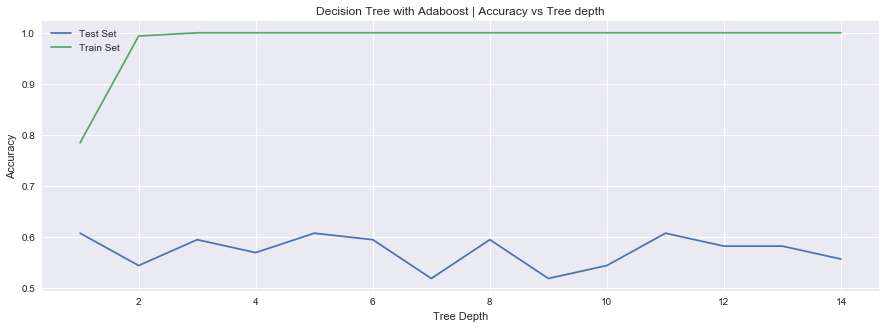

In [41]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(range(1,16),accuracy_test)
ax1.plot(range(1,16),accuracy_train)


plt.title("Decision Tree with Adaboost | Accuracy vs Tree depth")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")

plt.legend(['Test Set','Train Set'])

** The accuraccy of the train dataset increases as the tree depth increases and eventually the it reaches close to 1, which results to the overfitting of the model. <br><br>
The accuracy of the test dataset increases as the depth increases but after certain depth is starts to decreases, which is expected. <br>
From the graph of accuracy as the function of tree depth, it as clear that for this dataset the optimum tree depth is 1. **

## ADA Boosting with Pruning (depth =1)

In [66]:
Decision_tree= DecisionTreeClassifier( random_state=0, max_depth=1, criterion='entropy')
Adaboost_Classifier = AdaBoostClassifier(base_estimator=Decision_tree)
Adaboost_Classifier.fit(x_train, y_train)
predictions = Adaboost_Classifier.predict(x_test)
print("Decision Tree with Adaboost ")
print("\n")
print("Acuracy on training set: {:.3f}".format(Adaboost_Classifier.score(x_train, y_train)*100))
print("Acuracy on test set: {:.3f}".format(Adaboost_Classifier.score(x_test, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))

accuracy_train_f[3] =  np.round(DT_Student.score(x_train, y_train)*100,2)
accuracy_test_f[3] =  np.round(DT_Student.score(x_test, y_test)*100,2)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

Decision Tree with Adaboost 


Acuracy on training set: 78.481
Acuracy on test set: 60.759

 Confusion Matrix: 

[[20 19]
 [12 28]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.62      0.51      0.56        39
          1       0.60      0.70      0.64        40

avg / total       0.61      0.61      0.60        79



# Comparision of Models on the basis of Accuracy

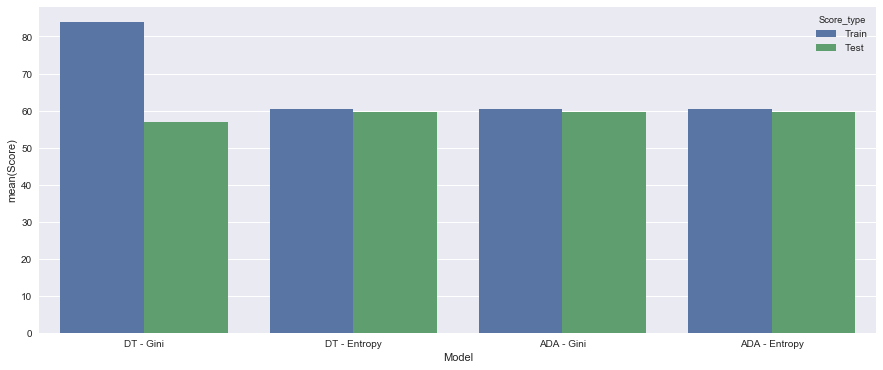

In [67]:
var = ['DT - Gini', 'DT - Entropy', 'ADA - Gini', 'ADA - Entropy']
accuracy_score = pd.DataFrame({'Model':var*2, 'Score_type':['Train']*4 +['Test']*4, 
                               'Score':accuracy_train_f + accuracy_test_f})

ax = sns.barplot(x="Model", y="Score", hue="Score_type", data=accuracy_score)